# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM 10**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import xgboost
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
#This code is to load the Train dataset
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# look at data statistics

#check the columns 
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [4]:
df_train.shape

(8763, 49)

## Notes  & Interpretation
The df_train dataset has eight thousand , seven hundred and sixty three rows. 
it also has 49 columns 

In [5]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [6]:
# This is to get further info like the columns data types and the number of null values present in the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [7]:
# the number of null values per column
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

## Notes  & Interpretation
After running the info and isnull() function commands. I  realised that there are three(3)(object datatype)i.e categorical data and forty-six (46)(float64) numerical features. The object dataypes are as follows time, Valencia_wind_deg and Seville_pressure

Moving forward, there would be a need to simplify the time column, delete or convert the remaining two categorical variable into a dummy variables depending on their effect on the model
<b>All other features have non-null entries except the valencia pressure having 2068 null entries</b> There would be a need to replace the missing values .

In [8]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Valencia_pressure,2068,0.235992
load_shortfall_3h,0,0.000000
Barcelona_wind_speed,0,0.000000
Seville_rain_3h,0,0.000000
Barcelona_pressure,0,0.000000
Bilbao_snow_3h,0,0.000000
Seville_rain_1h,0,0.000000
Seville_pressure,0,0.000000
Barcelona_rain_1h,0,0.000000
Seville_wind_speed,0,0.000000


In [9]:
#Check for duplicates 
df_train.duplicated().sum()

0

## Interpretation
The <b>Valencia Pressure </b> has more than 15% missing data . I would be working towards dropping this column or replacing the missing values with an appropriate value(mean or median)  as soon as I can confirm it has little or no effect on my model.


In [10]:
df_train.Valencia_pressure.describe()

count    6695.000000
mean     1012.051407
std         9.506214
min       972.666667
25%      1010.333333
50%      1015.000000
75%      1018.000000
max      1021.666667
Name: Valencia_pressure, dtype: float64

## Deduction
The mean or median might be a good candidate to represent the missing values. 


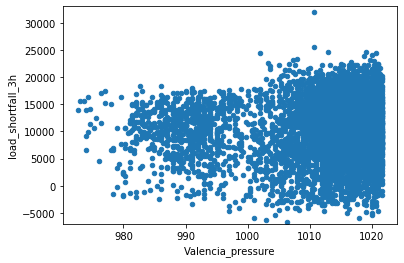

In [11]:
#scatter plot Valencia_pressure/load_shortfall_3h
var = 'Valencia_pressure'
data = pd.concat([df_train['load_shortfall_3h'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='load_shortfall_3h', ylim=(-7000,33000));

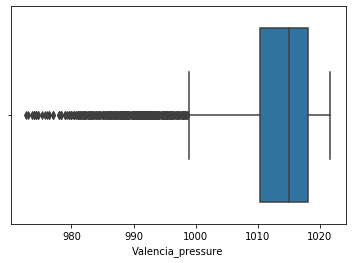

In [12]:
sns.boxplot(x='Valencia_pressure', data=df_train);

## Interpretation 
From the plot above, The <b>Valencia Pressure</b> has almost no relationship with the load_short_fall

## Descriptive Statistics

In [13]:
# This gives a summarised descriptive statistics of the data 
df_train['load_shortfall_3h'].describe()

count     8763.000000
mean     10673.857612
std       5218.046404
min      -6618.000000
25%       7390.333333
50%      11114.666667
75%      14498.166667
max      31904.000000
Name: load_shortfall_3h, dtype: float64

## Interpretation
The least load_short_fall is 6618 showing that the Renewable energy was higher than the fossil fuel energy by 66i8.
The average difference in enegy between the fossil fule energy and trhe renewable energy was 10673
The maximun difference in energy was 31904

|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 

In [14]:
# The skew helps to deduce the direction of tbe available outliers
df_train.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

## Interpretation
With emphasis on the Tagret variable (Load_short_fall), we can say the target variable is fairly distributed or symmetrical
as a result of its skewness((-0.384847) and kurtosis(-0.118999) values

In [15]:
#High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers
df_train.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

## Check out the descriptive statistics for this predictor variables with high kurtosis
Barcelona_rain_1h        
Seville_rain_1h           
Bilbao_snow_3h           
Barcelona_pressure       
Seville_rain_3h          
Madrid_rain_1h          
Barcelona_rain_3h        
Valencia_snow_3h

In [16]:
df_train['Barcelona_pressure'].describe()

count    8.763000e+03
mean     1.377965e+03
std      1.407314e+04
min      6.706667e+02
25%      1.014000e+03
50%      1.018000e+03
75%      1.022000e+03
max      1.001411e+06
Name: Barcelona_pressure, dtype: float64

In [17]:
df_train['Valencia_snow_3h'].describe()

count    8763.000000
mean        0.000205
std         0.011866
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.791667
Name: Valencia_snow_3h, dtype: float64

In [18]:
df_train['Bilbao_snow_3h'].describe()

count    8763.000000
mean        0.031912
std         0.557264
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        21.300000
Name: Bilbao_snow_3h, dtype: float64

In [19]:
df_train['Valencia_wind_speed'].describe()

count    8763.000000
mean        2.586272
std         2.411190
min         0.000000
25%         1.000000
50%         1.666667
75%         3.666667
max        52.000000
Name: Valencia_wind_speed, dtype: float64

## Interpretation
The load_short_fall lacks outliers

## Note & Interpretation
Based on the kurtosis values deduced, The following predictor variables have outliers and will be looked into before model prediction 
<li>Bilbao_rain_1h        32.904656
Valencia_wind_speed       35.645426
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882</li>



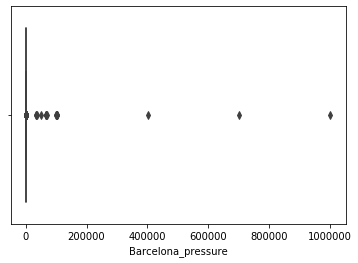

In [20]:
#As a way of confirming this 
sns.boxplot(x='Barcelona_pressure', data=df_train);

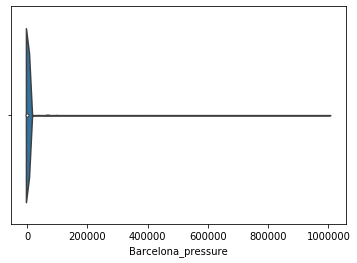

In [21]:
#As a way of confirming this 
sns.violinplot(x='Barcelona_pressure', data=df_train);

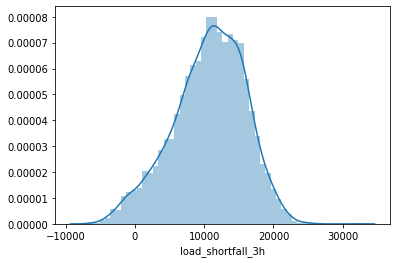

In [22]:

#histogram
sns.distplot(df_train['load_shortfall_3h']);

## Brief Scientific Research
###### Shortfall Energy means an amount calculated as the difference between the planned firm energy amounts from a resource in an identified period and a smaller amount of energy actually produced by that resource in the same identified period

###### Wind Speed:  Wind speed largely determines the amount of electricity generated by a turbine. Higher wind speeds generate more power because stronger winds allow the blades to rotate faster. Faster rotation translates to more mechanical power and more electrical power from the generator.

###### Pressure : Air moves around the Earth because of the differences in temperature and atmospheric pressure that exist. Wind turbines harness the movement of air to produce energy. The wind turns the blades which turn a rotor shaft; the resultant mechanical power is used to drive an electricity generator.

###### Humidity :Humidity can slow efficiency in two ways .Tiny water droplets, or water vapor, can collect on solar panels (like beads of sweat) and reflect or refract sunlight away from solar cells. This reduces the amount of sunlight hitting them and producing electricity

# Univariate Analysis
<b>Below are some Univariate analysis </b>

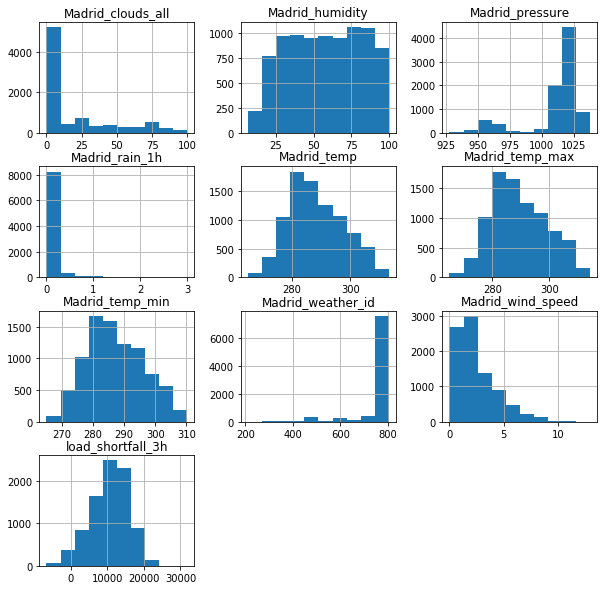

In [23]:
# To get the distribution of some numerical features, I used the following plots:
features = ['load_shortfall_3h','Madrid_wind_speed', 'Madrid_humidity', 'Madrid_clouds_all',
        'Madrid_rain_1h', 'Madrid_weather_id', 'Madrid_pressure', 'Madrid_temp_max',
        'Madrid_temp', 'Madrid_temp_min'] # create a list of all numerical features
df_train[features].hist(figsize=(10,10));

## Categorical variables 

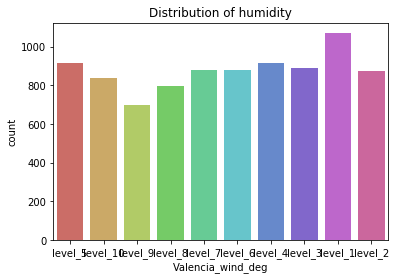

In [24]:
# To deduce pattern for catgorical variables, I made a bar plot of the valencia wind deg
sns.countplot(x = 'Valencia_wind_deg', data = df_train, palette="hls")
plt.title("Distribution of humidity");

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


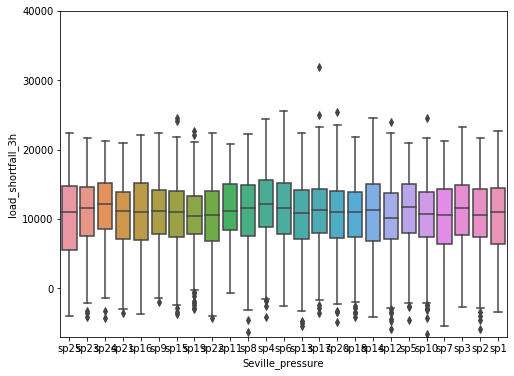

In [25]:
#Relationship between load shortfalls and categorical Valencia_wind_deg
#box plot overallqual/load shortfall
var = 'Seville_pressure'
data = pd.concat([np.log2(df_train['load_shortfall_3h']), df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="load_shortfall_3h", data=df_train)
fig.axis(ymin=-7000, ymax=40000);

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


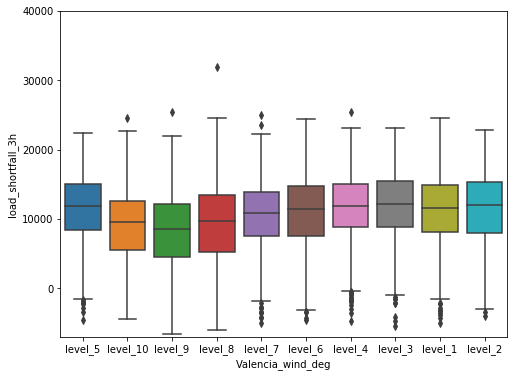

In [26]:
#Relationship between load shortfalls and categorical Valencia_wind_deg
#box plot overallqual/load shortfall
var = 'Valencia_wind_deg'
data = pd.concat([np.log2(df_train['load_shortfall_3h']), df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="load_shortfall_3h", data=df_train)
fig.axis(ymin=-7000, ymax=40000);

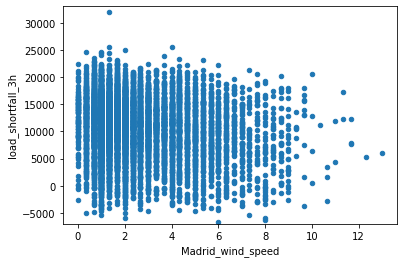

In [27]:
# plot relevant feature interactions
#scatter plot Madrid_wind_speed/load_shortfall_3h
var = 'Madrid_wind_speed'
data = pd.concat([df_train['load_shortfall_3h'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='load_shortfall_3h', ylim=(-7000,33000));

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


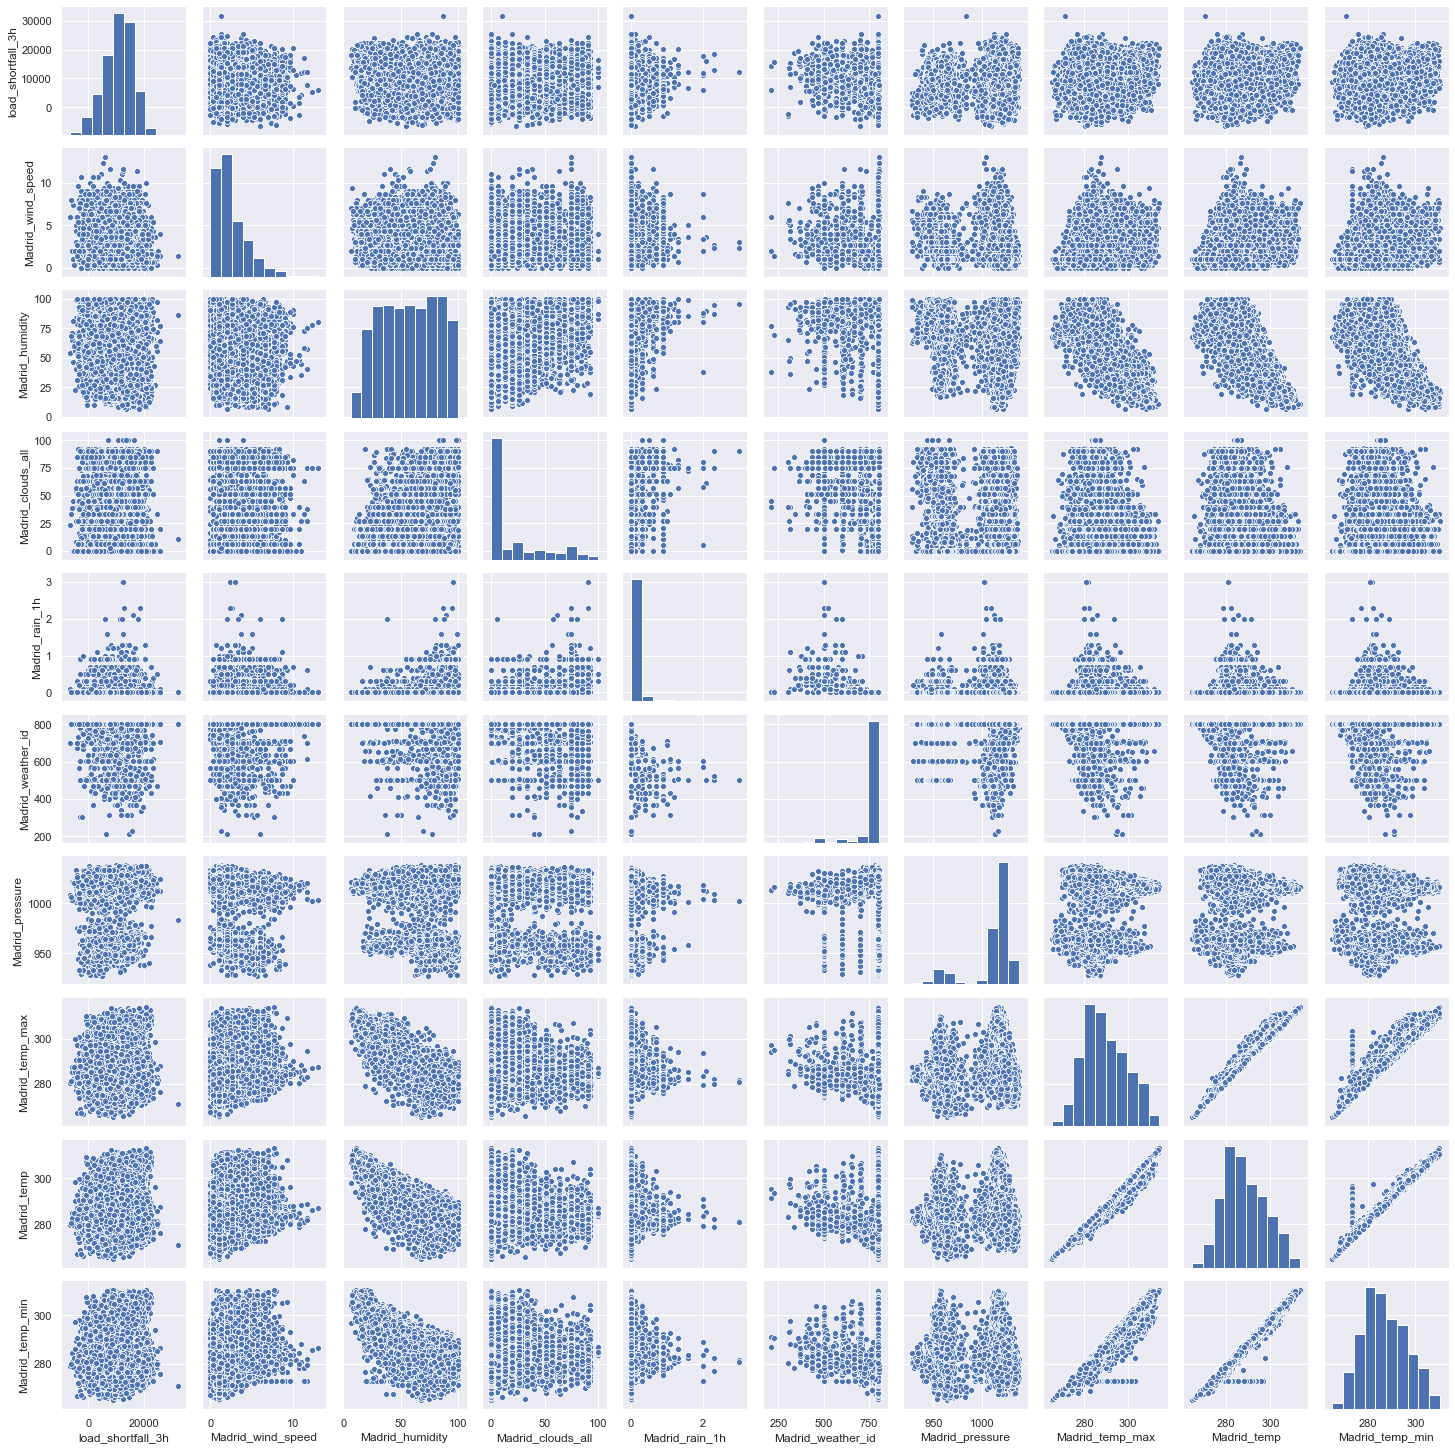

In [28]:
#scatterplot of Madrid city parameters and load_shortfall_3h to check relationship between predictor variables 
# of a city and the target variable.

sns.set()
cols = ['load_shortfall_3h','Madrid_wind_speed', 'Madrid_humidity', 'Madrid_clouds_all',
        'Madrid_rain_1h', 'Madrid_weather_id', 'Madrid_pressure', 'Madrid_temp_max',
        'Madrid_temp', 'Madrid_temp_min']
sns.pairplot(df_train[cols], size = 2.0)
plt.show();

# Multivariate Analysis
<b> Below are some multivariate analysis </b>

In [29]:
df_train.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


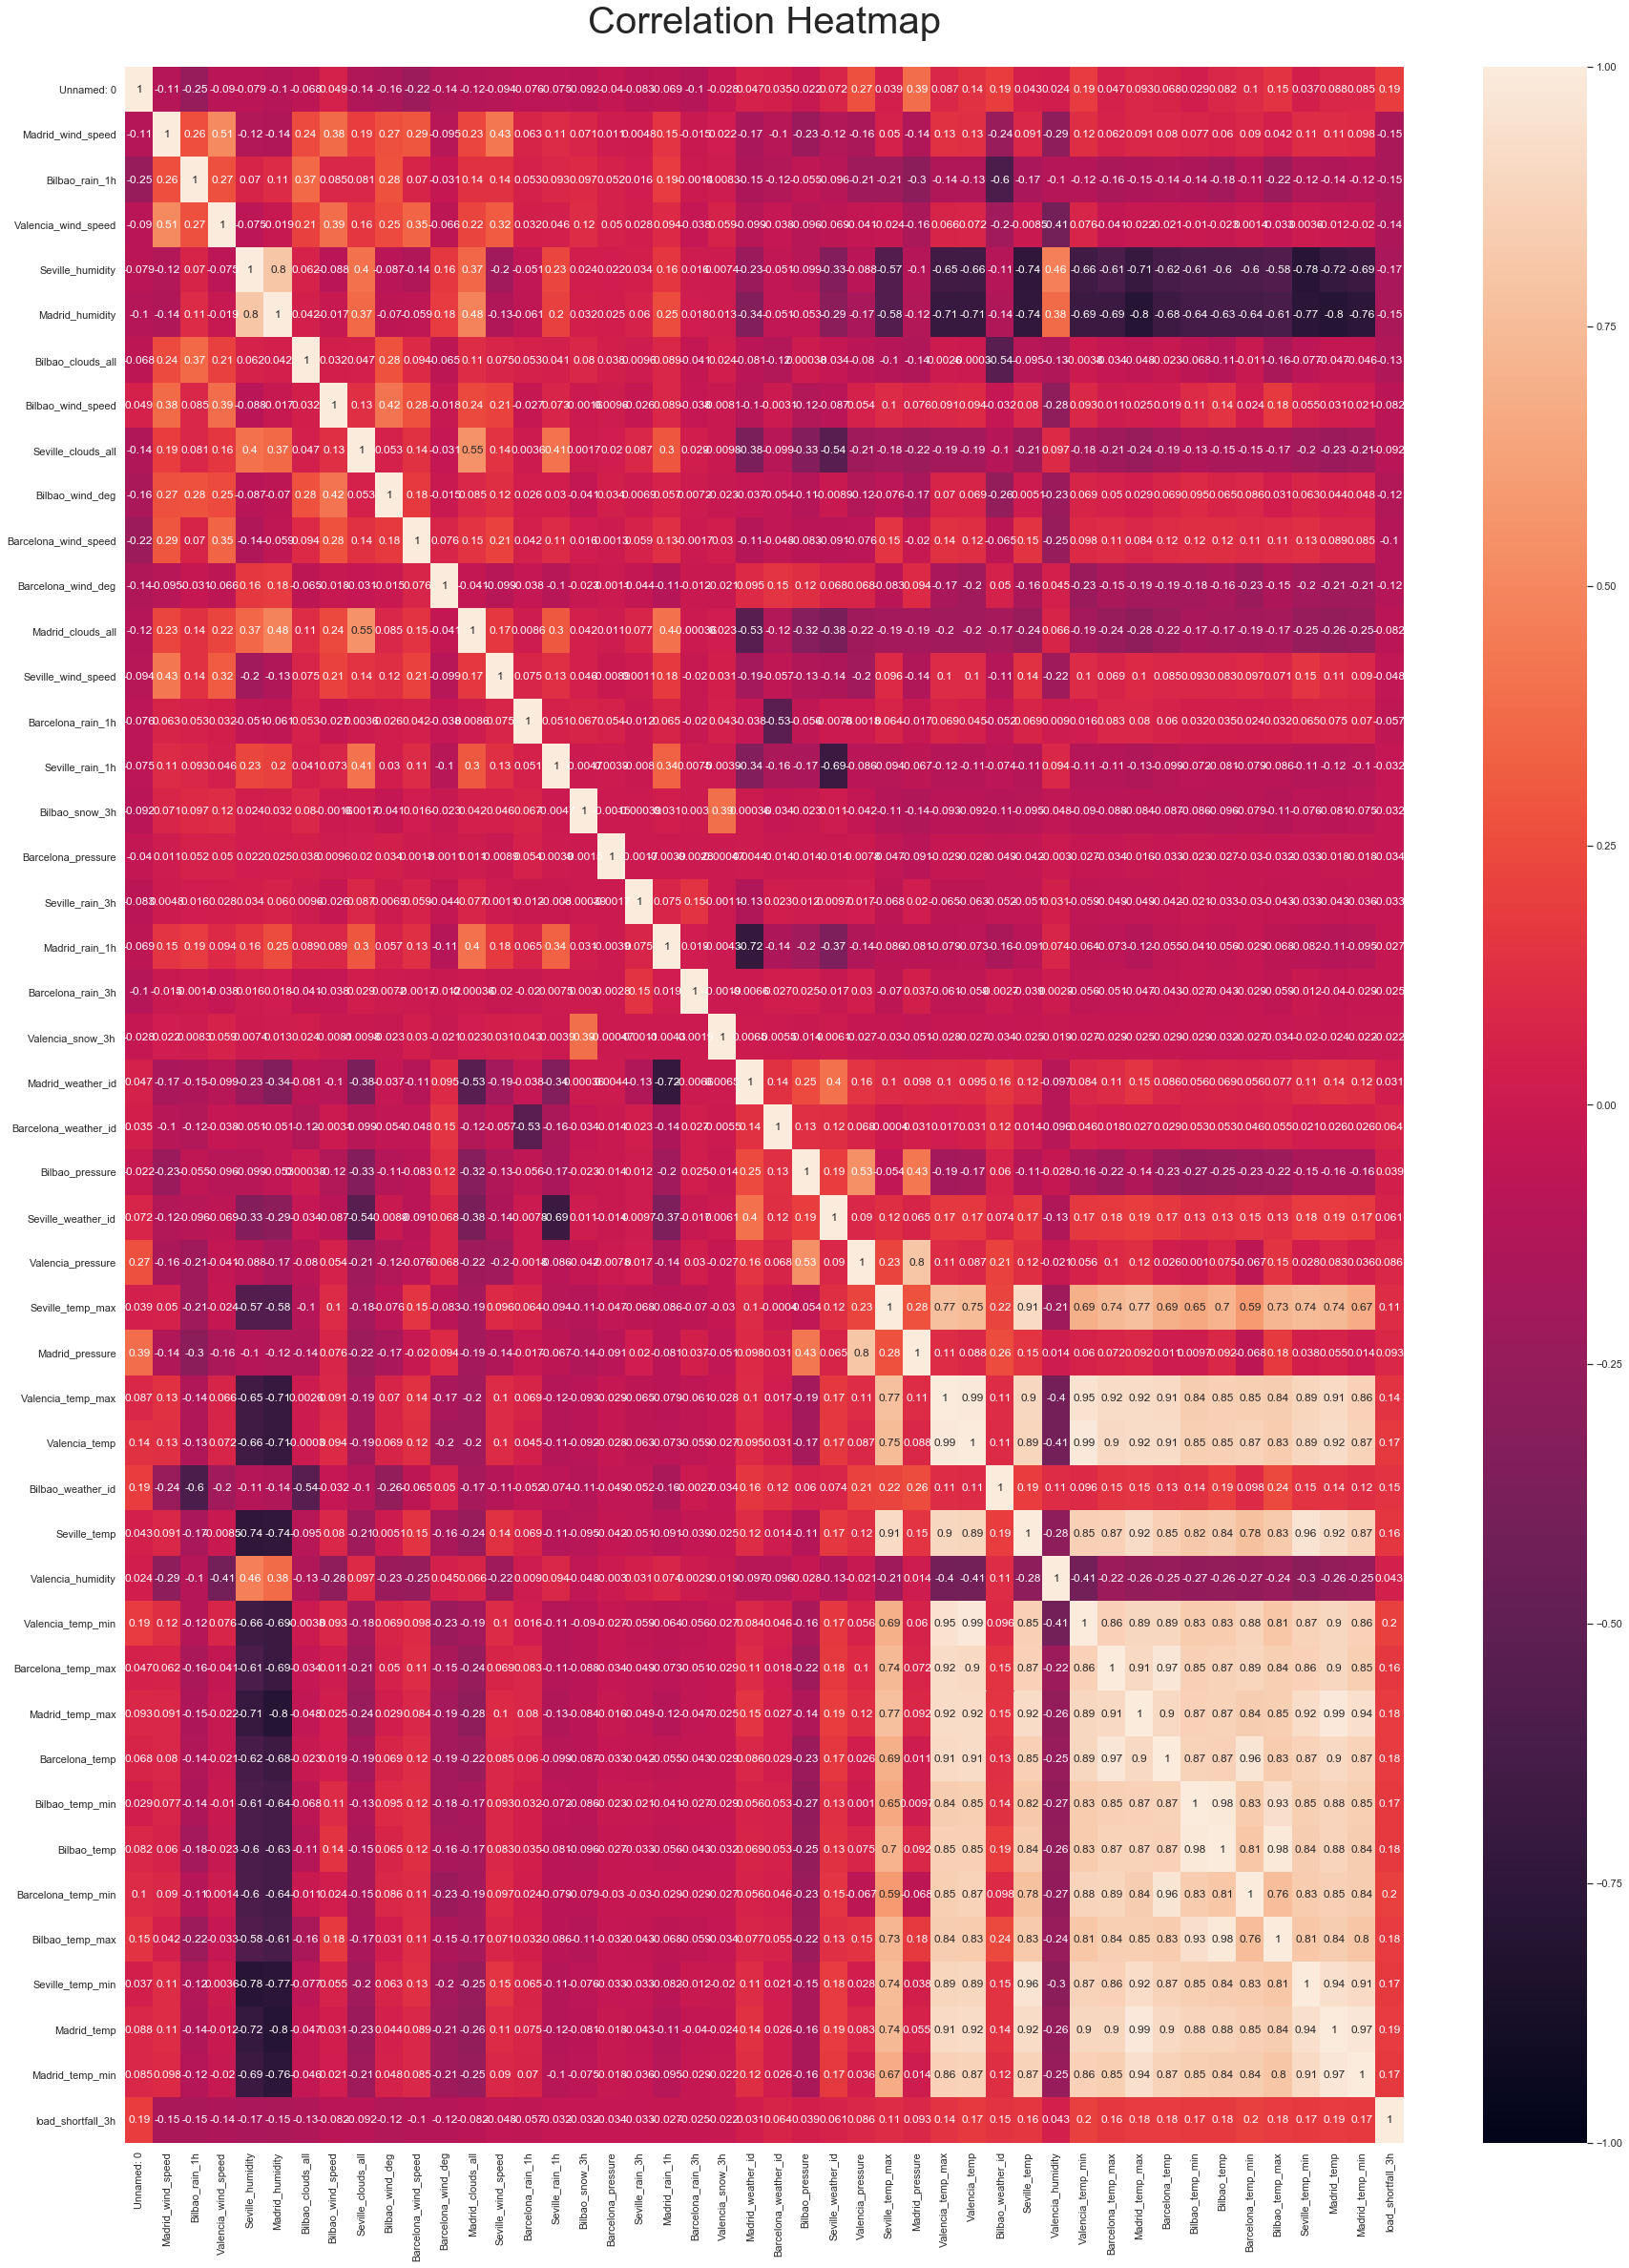

In [30]:
plt.figure(figsize=(30, 40))
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':40}, pad=35);


## Deduction
<li>There will be a need to represent the colinearly related variables of the cities like maximum temp,
    minimum temp etc with just one variable for a city </li>


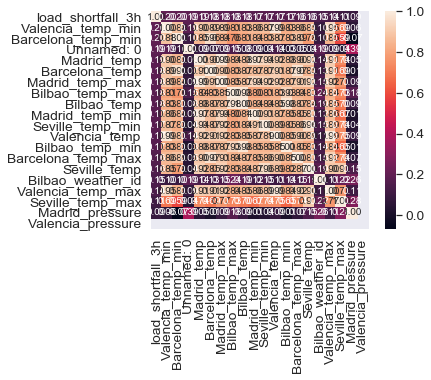

In [31]:
#saleprice correlation matrix
corrmat = df_train.corr()
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'load_shortfall_3h')['load_shortfall_3h'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Action Required 
<li>Remove outliar values from predictor variables with outrageous outliars </li>
<li>Replace missing values in valencia pressure with the mean value </li>
<li>Drop categorical variables like sevilla pressure and valencia wind degree </li>
<li>Drop variables like weather IDs that have no effect on the load shortfall </li>
<li> Represent maximum and minimum temperature variables with just one max AND min of a single state</li> 
<li> Standardize the variables with high kurtosis values  </li>


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

#### Make a copy of your train dataframe for analysis

In [32]:
df_train1 = df_train.copy()

In [33]:
df_train1.loc[df_train1['Valencia_wind_speed']>20,'Valencia_wind_speed'] = df_train1['Valencia_wind_speed'].median() 

In [34]:
df_train1.loc[df_train1['Barcelona_pressure']>1500,'Barcelona_pressure'] = df_train1['Barcelona_pressure'].mean() 

In [35]:
df_train1['Valencia_wind_speed'].describe()

count    8763.000000
mean        2.560139
std         2.240768
min         0.000000
25%         1.000000
50%         1.666667
75%         3.666667
max        20.000000
Name: Valencia_wind_speed, dtype: float64

In [36]:
df_train1['Barcelona_pressure'].describe()

count    8763.000000
mean     1018.609517
std        18.735599
min       670.666667
25%      1014.000000
50%      1018.000000
75%      1022.000000
max      1377.964605
Name: Barcelona_pressure, dtype: float64

#### Replace missing values in valencia pressure with the mean value

In [37]:
df_train1["Valencia_pressure"].fillna(df_train1['Valencia_pressure'].mean(), inplace = True)

#### Confirm the replacement

In [38]:
df_train1.isnull().sum().sort_values(ascending=False)

load_shortfall_3h       0
Barcelona_rain_3h       0
Seville_rain_3h         0
Barcelona_pressure      0
Bilbao_snow_3h          0
Seville_rain_1h         0
Seville_pressure        0
Barcelona_rain_1h       0
Seville_wind_speed      0
Madrid_clouds_all       0
Barcelona_wind_deg      0
Barcelona_wind_speed    0
Bilbao_wind_deg         0
Seville_clouds_all      0
Bilbao_wind_speed       0
Bilbao_clouds_all       0
Madrid_humidity         0
Seville_humidity        0
Valencia_wind_speed     0
Bilbao_rain_1h          0
Valencia_wind_deg       0
Madrid_wind_speed       0
time                    0
Madrid_rain_1h          0
Valencia_snow_3h        0
Madrid_temp_min         0
Madrid_weather_id       0
Madrid_temp             0
Seville_temp_min        0
Bilbao_temp_max         0
Barcelona_temp_min      0
Bilbao_temp             0
Bilbao_temp_min         0
Barcelona_temp          0
Madrid_temp_max         0
Barcelona_temp_max      0
Valencia_temp_min       0
Valencia_humidity       0
Seville_temp

In [39]:
df_train2 = df_train1.copy()

#### Drop categorical variables 

In [40]:
df_train3 = df_train2.drop(['Seville_pressure','Valencia_wind_deg','Madrid_weather_id','Barcelona_weather_id','Seville_weather_id','Bilbao_weather_id'], axis=1)  #df.drop(['C', 'D'], axis = 1)
df_train3.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure',
       'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h',
       'Valencia_snow_3h', 'Bilbao_pressure', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
       'Valencia_temp', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h'],
      dtype='object')

#### Drop  variables that cause noise (weather IDs) and multicolinear variables like min. and max.temperature of citites .
#### Note use just one min and max temp of a city 

In [41]:
df_train4 = df_train3.drop(['Unnamed: 0','Seville_temp','Seville_temp_max','Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min'], axis =1)
df_train4.columns

Index(['time', 'Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Bilbao_pressure', 'Valencia_pressure', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'load_shortfall_3h'],
      dtype='object')

### Split time column into separate periods i.e year, month, day and hour 

In [42]:
df_time = df_train4

In [43]:
# create a new df and deal with the time column
df_time['time'] = pd.to_datetime(df_time['time'])
df_time['year'] = pd.DatetimeIndex(df_time['time']).year
df_time['month'] = pd.DatetimeIndex(df_time['time']).month
df_time['day'] = pd.DatetimeIndex(df_time['time']).day
df_time['hour'] = pd.DatetimeIndex(df_time['time']).hour





In [44]:
df_time = df_time.drop(['time'], axis=1)

In [45]:
df_time.columns

Index(['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Bilbao_pressure', 'Valencia_pressure', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'load_shortfall_3h', 'year', 'month', 'day',
       'hour'],
      dtype='object')

#### Re-arrange the columns 

In [46]:
df= df_time[['year', 'month','day', 'hour','Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Bilbao_pressure', 'Valencia_pressure', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'load_shortfall_3h']]


In [47]:
df.columns

Index(['year', 'month', 'day', 'hour', 'Madrid_wind_speed', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure',
       'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h',
       'Valencia_snow_3h', 'Bilbao_pressure', 'Valencia_pressure',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Valencia_humidity', 'Valencia_temp_min', 'load_shortfall_3h'],
      dtype='object')

## Apply data preprocessing steps  to Test dataset

In [48]:
df_test1 = df_test.copy()

In [49]:
df_test1.loc[df_test1['Valencia_wind_speed']>20,'Valencia_wind_speed'] = df_test1['Valencia_wind_speed'].median() 

df_test1.loc[df_test1['Barcelona_pressure']>1500,'Barcelona_pressure'] = df_test1['Barcelona_pressure'].mean() 

In [50]:
df_test1["Valencia_pressure"].fillna(df_test1['Valencia_pressure'].mean(), inplace = True)

In [51]:
df_test2 = df_test1.copy()

In [52]:
df_test3 = df_test2.drop(['Seville_pressure','Valencia_wind_deg','Madrid_weather_id','Barcelona_weather_id','Seville_weather_id','Bilbao_weather_id'], axis=1)  #df.drop(['C', 'D'], axis = 1)


In [53]:
df_test3.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure',
       'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h',
       'Valencia_snow_3h', 'Bilbao_pressure', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
       'Valencia_temp', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min'],
      dtype='object')

In [54]:
df_test4 = df_test3.drop(['Unnamed: 0','Seville_temp','Seville_temp_max','Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min'], axis =1)


In [55]:
df_test4.columns

Index(['time', 'Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Bilbao_pressure', 'Valencia_pressure', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Valencia_humidity',
       'Valencia_temp_min'],
      dtype='object')

In [56]:
df_timet = df_test4

# create a new df and deal with the time column
df_timet['time'] = pd.to_datetime(df_timet['time'])
df_timet['year'] = pd.DatetimeIndex(df_timet['time']).year
df_timet['month'] = pd.DatetimeIndex(df_timet['time']).month
df_timet['day'] = pd.DatetimeIndex(df_timet['time']).day
df_timet['hour'] = pd.DatetimeIndex(df_timet['time']).hour







In [57]:
df_timet = df_timet.drop(['time'], axis=1)

In [58]:
dfT= df_timet[['year', 'month','day', 'hour','Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Bilbao_pressure', 'Valencia_pressure', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Valencia_humidity',
       'Valencia_temp_min']]


In [59]:
dfT.columns

Index(['year', 'month', 'day', 'hour', 'Madrid_wind_speed', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure',
       'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h',
       'Valencia_snow_3h', 'Bilbao_pressure', 'Valencia_pressure',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Valencia_humidity', 'Valencia_temp_min'],
      dtype='object')

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

## Creating different base models but this time testing it with the test dataset 

In [60]:
df.columns

Index(['year', 'month', 'day', 'hour', 'Madrid_wind_speed', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure',
       'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h',
       'Valencia_snow_3h', 'Bilbao_pressure', 'Valencia_pressure',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Valencia_humidity', 'Valencia_temp_min', 'load_shortfall_3h'],
      dtype='object')

In [61]:

# Split into features and targets
X = df.drop(['load_shortfall_3h'], axis=1)
y = df['load_shortfall_3h']


# Instantiate scaler and fit predictor features
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)



In [62]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


In [63]:
# Linear Regression
lin_reg = LinearRegression()

# Support vector 
sv_reg = SVR(C=8, epsilon=0.1, gamma='scale')

# XGBRegressort
model = XGBRegressor(n_estimators=400, alpha=0.5, min_samples_split=10, max_depth=3, learning_rate=0.1,
                     objective="reg:squarederror", min_child_weight=5)

# Random Forest
forest = RandomForestRegressor(n_estimators=100, max_depth=5) #ensemble of decision trees

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=400, alpha=0.5, min_samples_split=10, max_depth=3, learning_rate=0.1)


In [64]:
# Fit all the models
lin_reg.fit(X_train, y_train) # linear regression model

sv_reg.fit(X_train, y_train) # support vector model

forest.fit(X_train, y_train)  # random forest model

model.fit(X_train, y_train)  # xgboost model

gbr.fit(X_train, y_train) #gradient boosting model

[16:53:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GradientBoostingRegressor(alpha=0.5, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

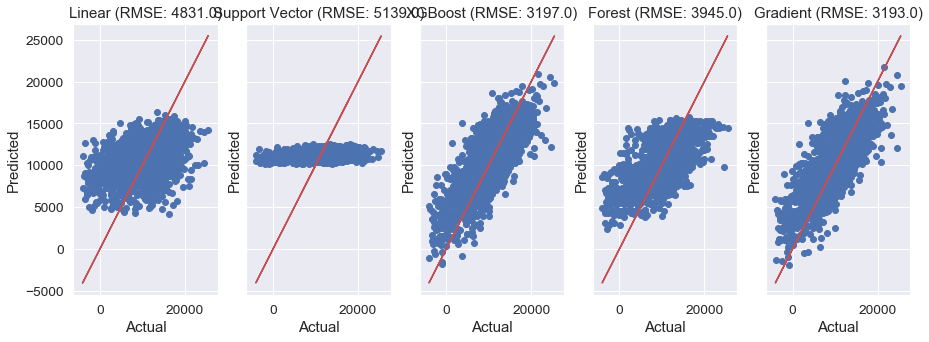

In [65]:
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=5, sharey=True)

# create title lists and predictions for use in loop
pred = [lin_reg.predict(X_test), sv_reg.predict(X_test), model.predict(X_test), forest.predict(X_test), gbr.predict(X_test)]
title = ['Linear', 'Support Vector', 'XGBoost', 'Forest', 'Gradient']


# Loop through all the axes and plot model results
for i in range(5):
    rmse = round(np.sqrt(MSE(pred[i], y_test)))
    ax[i].set_title(title[i]+" (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test,pred[i])

In [66]:

df_test1_scaled = scaler.fit_transform(dfT)



In [67]:
#gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

In [68]:
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare

,Actual,Predicted
6878,17533.666667,13979.520811
3784,4434.000000,8096.128055
1261,11515.666667,8050.154799
4761,14179.333333,12385.270615
7080,6127.000000,8349.877769
...,...,...
7331,10114.666667,15595.551722
7428,13497.000000,12351.610334
5980,6185.666667,6289.251156
4731,8088.333333,10877.191483


In [69]:
from sklearn.metrics import mean_squared_error as MSE
print('RMSE: ', np.sqrt(MSE(y_test, y_pred)))
#print('RMSE for dataset without time feature: ', np.sqrt(MSE(y_test2, y_pred2)))

RMSE:  3193.3522503507256


In [70]:
y_pred_test =  gbr.predict(df_test1_scaled)


In [71]:
y_pred_test

array([ 6762.84488904,  2332.01779703,   718.913604  , ...,
       12658.95603021, 13686.05836511, 13662.35967116])

In [72]:
#y_pred  # Assume this is your predicted variables in array format
#submission = df_test[['time']] # this is the time column extracted from the test.csv file 
                                #and saved inside a submission variable as a table
#submission['load_shortfall_3h'] = y_pred #This code adds the predicted load column to this dataframe

#submission.to_csv('Basemodel_new.csv')  # this converts the file to a csv

In [73]:
# Create csv file
#dtime = df_test['time']
#model_test_df = pd.DataFrame({'time': dtime, 'load_shortfall_3h':y_pred_test})
##model_test_df.head(20)

#model_test_df.to_csv('/content/drive/MyDrive/Athena - Explore/Advanced-Regression-Starter-Data/model2.csv', index=False)

In [74]:
#The following codes are used to save the expected predictions for kaggle submission
final_file = df_test[['time']]
final_file['load_shortfall_3h']= y_pred_test
final_file.to_csv('submission_final.csv', index = None)

In [86]:
#this codes helps to pickle the model 
import pickle

model_save_path = "mlr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(gbr,file)

In [80]:
# create targets and features dataset

In [81]:
# create one or more ML models

In [82]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [83]:
# Compare model performance

In [84]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [85]:
# discuss chosen methods logic